<font size="+3"><strong>A/B Testing and Analysis</strong></font>

In [2]:
__author__ = "Donald Ghazi"
__email__ = "donald@donaldghazi.com"
__website__ = "donaldghazi.com"

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, I will be working to understand the results of an A/B test run by an e-commerce website. My goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.
<a id='probability'></a>
#### Part I - Probability



In [136]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [137]:
#load data 
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [138]:
#check for number of rows 
df.shape[0]

294478

c. The number of unique users in the dataset.

In [139]:
# within df, check user id column to find the number of unique users  *returns as series 
df["user_id"].nunique() 

290584

d. The proportion of users converted.

In [140]:
#within df, find the (mean=proportion) of the coverted column   *return as series
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [141]:
#check to see if any missing info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [142]:
#filter when "treatment" group doesn't have "new page" OR non-"treatment" groups have "new page" and count # of rows
len(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")'))

3893

f. Do any of the rows have missing values?

In [143]:
#check for any missing values in the original df.   *already checked and should be False 
df.isnull().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [144]:
#select (1.e) w/ additional 2 conditions: control group doesn't have new page OR non control group has old page 
#set selected df above as df2
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [145]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [146]:
# within df2, check user id column to find the number of unique users  *returns as series 
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [147]:
#within df2, check for duplicated user id and return that unique value as an array 
df2[df2.duplicated(['user_id'])]['user_id'].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [148]:
#within df2, find duplicated rows under user_id column 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [149]:
#keep the first row 
df2 = df2[~df2.user_id.duplicated(keep='first')]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [150]:
#find the mean of the 'converted' column
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [151]:
#select control group and find the mean using 'converted' column
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [152]:
#select treatment group and find the mean using 'converted' column
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [153]:
#number of new page individuals divided by total number of individuals (rows)
len(df2.query("landing_page == 'new_page'")) / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is no sufficient evidence to conclude that the new treatment page leads to more conversions.** <br>
- **Overall converted rate: 11.96%**
- **Control converted rate: 12.04%**
- **Treatment converted rate: 11.88%**
- **Conversion probability for treated group is LOWER than BOTH a) overall and b) the control group's**
- **Both groups receive new page equally (50%)**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer.**
- **Null Hypothesis**  $H_{0}$: $p_{new}$-$p_{old}$ ≤ 0 
 - New page is worse or just as good as the old page
  
- **Alternative Hypothesis**  $H_{1}$: $p_{new}$-$p_{old}$ > 0 
 - New page is better than the old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [154]:
# p_new = converted success rate regardless of page 
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [155]:
# p_old = p_new under the null described above 
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [156]:
#within df2, compute the number users who has new page 
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [157]:
#within df2, compute the number users who has old page 
n_old = df2.query("landing_page == 'old_page'").shape[0]  
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [158]:
# use binomial b/c "true" success for both are equal, under null hypothesis 
# simulate 1 test for the average of n_new binomial flips with a convert rate of p_null
# n=1 trial size, p=probability of trial, size=number of trials to run 
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.11871860161035029

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [159]:
#simulate 1 test for the average of n_old binomial flips with a conversion rate under the null
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.12101959056679103

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [160]:
#calculate difference in average conversions
new_page_converted.mean() - old_page_converted.mean()

-0.002300988956440736

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [161]:
#simulate 10,000 tests for the average of n_old and n_new binomial flips with a conversion rate under the null
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diff = new_page_converted.mean() - old_page_converted.mean()
#append each result to p_diff
    p_diffs.append(p_diff)

In [162]:
#store p-diffs as an array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [163]:
#probability of individuals were in the treatment group, then they converted 
#probability of individuals were in the control group, then they converted 

#actual observed difference (observation of differences in conversion) 
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

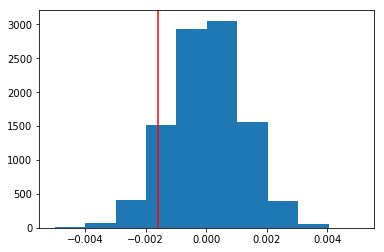

In [164]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [165]:
#actual observed difference (observation of differences in conversion)
obs_diff

-0.0015782389853555567

In [166]:
#proportion is equal to the p-value of our null hypothesis
p_diff_proportion = (p_diffs > obs_diff).mean()
p_diff_proportion

0.90669999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- **Our observed statitics (observed difference) fall at -0.001578**
- **We computed the p-value by finding the proportion of null values which are greater than observed difference aka observation from the dataset**
- **p_diff_proportion is equal to the p-value of our given null hypothesis (assuming Pnew = Pold)**
- **There's a significant portion of the null values that are more extreme than the statistics (right to the red line)**
- **Generally, p_values less than 0.05 are considered to be significant**
- **Our p-value (0.9) is greater than 0.05 so the relationship (difference between the new and old pages) is not statistically significant. This means there's weak evidence against the null**
- **In conclusion, we fail to reject the null because with the Type I error threshold of .05, old page has higher probablity of convert rate than new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [167]:
#null: new page = old page 
#alternative: new page > old page
#count number of conversions for both the old and new page passed 
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [168]:
#pass as 'smaller' to fit our alternatative hypothesis (new page > old page) b/c z_test is two sided by default
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new],alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [169]:
# Z score
z_score

1.3109241984234394

In [170]:
#p value
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **P-value is the probability that falsely rejected the null hypothesis**
- **Z-score represents the number of standard deviations a point is from the mean**
- **Our results shows that our z-score is less than 1.5, meaning our conversion rate for the new page is less than 95% of the old page**
- **Our p-value is the same (.9) and still greater than .05** 
- **Thus, reaffirming that we cannot reject the null hypothesis (fail to reject the null)**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- **Above indicates that we have a binary outcome and regression only works with numerical values**
- **Logistic regression should be used to perform in this case because the dependent variable is categorical data**
- **The data contains only 2 outcomes, which predicts a probability between 0 and 1**
- **Moreoever, we want to predict 1 of 2 possible outcomes: whether a user will convert or not depending on the page (old or new)**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [171]:
#so far we know that  old page= control group = interecept 

#we need to create new columns to represent the categorical fields
#so we 5need to have number of the newly created columns that's equal to the number of categorical values

#create a column for the intercept w/ coefficient of 1 as described above w/ control as basline 
#Dummy coded variables have values of 0 for the treatment (reference) group and 1 for the control (treatment) group
df2['intercept'] = 1

In [172]:
#create a dummy variable column for which page each user received
#drop new_page b/c it's the same thingas ab_page
df2= df2.join(pd.get_dummies(df2['landing_page']))

In [173]:
#create ab_page column where control group is dropped (b/c it's same as old_age )  *intercept becomes our baseline 
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [174]:
#Create Logistic Regression Model for converted variable and ab_page 
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

In [175]:
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [176]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-20 22:49 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- **The p-value associated with ab_page is .1899 which is greater than .05, so it's not statistically significant**
- **The p-value for old page is 0, which shows that it's statistically significant**
- **It differs from the value found in Part II b/c this time it was a two-sided test, instead**
- **In our regression model (Part III), there's no difference between treatment and control group under the null whereas our alternative is that there's a difference between the two groups**
- **In Part II, we assume that old page is better than, or equal to, the new page, under the null. While our alternative hypothesis was that old page is worse than the new page**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- **It's important to consider other factors to add into our regression model because there may be other factors (variables) that influence a convertion. And these may not have been included in our regression model which can help us make better predictions**
- **However, there are disadvatanges as well if you add too many variables in a regression analysis. For example, our sample size may not be large enough and trying to estimate too many parameters with our given sample leads to overfitting, thus giving us with untrusty results**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [177]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [178]:
# check country column to see how many unique values (entries) there are 
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [179]:
# create necessary dummy variables and list the column in alphabetical order (A-Z)
# double check 
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [180]:
# drop US which is now the baseline
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [181]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-20 22:50 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

 - **It doesn't seem like country had an impact on conversion rate. As the coefficient equals to 0 (no effect) And with P-value > .05, we know that it's not statistically significant**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [182]:
#create the necessary dummy variables
df3[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [183]:
#consider US and CA
logit1 = sm.Logit(df3['converted'],df3[['intercept','US','CA']]).fit()
logit1.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-20 22:50 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

In [184]:
#consider UK and CA
logit2 = sm.Logit(df3['converted'],df3[['intercept','UK','CA']]).fit()
logit2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-20 22:50 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
==================================================================

"""

In [185]:
#consider UK and US
logit3 = sm.Logit(df3['converted'],df3[['intercept','UK','US']]).fit() 
logit3.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-20 22:50 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

- **Looking at an interactions between 'converted' and countries, there's no evidence that countries have impact on the converion rates. With what we have, we can accept the Null Hypothesis (no significant difference in conversion rates) and reject the alternative hypothesis**